In [13]:
import pandas as pd

In [14]:
inflation = pd.read_csv('inflation.csv')
inflation = inflation.astype({'Year':'int'})
inflation = inflation.drop(['HALF1', 'HALF2'], axis=1)
inflation

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2013,1.9,2.0,1.9,1.7,1.7,1.6,1.7,1.8,1.7,1.7,1.7,1.7
1,2014,1.6,1.6,1.7,1.8,2.0,1.9,1.9,1.7,1.7,1.8,1.7,1.6
2,2015,1.6,1.7,1.8,1.8,1.7,1.8,1.8,1.8,1.9,1.9,2.0,2.1
3,2016,2.2,2.3,2.2,2.1,2.2,2.2,2.2,2.3,2.2,2.1,2.1,2.2
4,2017,2.3,2.2,2.0,1.9,1.7,1.7,1.7,1.7,1.7,1.8,1.7,1.8
5,2018,1.8,1.8,2.1,2.1,2.2,2.3,2.4,2.2,2.2,2.1,2.2,2.2
6,2019,2.2,2.1,2.0,2.1,2.0,2.1,2.2,2.4,2.4,2.3,2.3,2.3
7,2020,2.3,2.4,2.1,1.4,1.2,1.2,1.6,1.7,1.7,1.6,1.6,1.6
8,2021,1.4,1.3,1.6,3.0,3.8,4.5,4.3,4.0,4.0,4.6,4.9,5.5
9,2022,6.0,6.4,6.5,6.2,6.0,5.9,5.9,6.3,6.6,6.3,6.0,5.7


In [15]:
# Create dictionary to map month names to numbers
months = {
    'Jan': 1, 
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Melting the DataFrame to combine month columns into 'Month' and 'Value' columns
inflation = pd.melt(inflation, id_vars=['Year'], var_name='Month', value_name='INFLATION')

# Creating the 'DATE' column by combining 'YEAR', 'Month', and '01'
inflation['DATE'] = pd.to_datetime(inflation['Year'].astype(str) + '-' + inflation['Month'] + '-01')

# Dropping the 'YEAR' and 'Month' columns if not needed anymore
inflation.drop(columns=['Year', 'Month'], inplace=True)

inflation.dropna(inplace=True)

inflation.sort_values(by=['DATE'], inplace=True)

inflation['DATE'] = pd.to_datetime(inflation['DATE'])

inflation.set_index('DATE', inplace=True)
inflation.sort_values(by=['DATE'], inplace=True)

inflation

,INFLATION
DATE,
2013-01-01,1.9
2013-02-01,2.0
2013-03-01,1.9
2013-04-01,1.7
2013-05-01,1.7
...,...
2023-03-01,5.6
2023-04-01,5.5
2023-05-01,5.3


In [16]:
import pandas as pd

# Sample DataFrame
data = {'YEAR': [2021, 2022, 2023],
        'jan': [10, 15, 20],
        'feb': [12, 18, 22],
        'mar': [14, 20, 24]}

df = pd.DataFrame(data)

# Melting the DataFrame to combine month columns into 'Month' and 'Value' columns
df_melted = pd.melt(df, id_vars=['YEAR'], var_name='Month', value_name='Value')

# Creating the 'DATE' column by combining 'YEAR', 'Month', and '01'
df_melted['DATE'] = pd.to_datetime(df_melted['YEAR'].astype(str) + '-' + df_melted['Month'] + '-01')

# Dropping the 'YEAR' and 'Month' columns if not needed anymore
df_melted.drop(columns=['YEAR', 'Month'], inplace=True)

print(df_melted)


   Value       DATE
0     10 2021-01-01
1     15 2022-01-01
2     20 2023-01-01
3     12 2021-02-01
4     18 2022-02-01
5     22 2023-02-01
6     14 2021-03-01
7     20 2022-03-01
8     24 2023-03-01


/var/folders/b7/jtfw7lbj0mn18fznly0bdtq00000gn/T/ipykernel_11880/2663143659.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['DATE'] = pd.to_datetime(df_melted['YEAR'].astype(str) + '-' + df_melted['Month'] + '-01')


In [20]:
cpi = pd.read_csv('PCEPILFE.csv')
cpi['PCEPILFE'] = cpi['PCEPILFE'] - 100.00
cpi['DATE'] = pd.to_datetime(cpi['DATE'])
cpi.set_index('DATE', inplace=True)
cpi.sort_values(by=['DATE'], inplace=True)
cpi

,PCEPILFE
DATE,
2013-01-01,0.871
2013-02-01,0.992
2013-03-01,1.085
2013-04-01,1.163
2013-05-01,1.272
...,...
2023-03-01,27.257
2023-04-01,27.655
2023-05-01,28.029


In [18]:
# z = zip(cpi2['PCEPILFE'][1:], cpi2['PCEPILFE'])
# a = [round((((x[0] - x[1]) / x[1]) * 100.0), 2) for x in z]
# a

In [19]:
# fred = pd.read_csv('FEDFUNDS.csv')
# fred['DATE'] = pd.to_datetime(fred['DATE'])
# fred = fred[fred['DATE'] >= '2013-01-01']
# fred.reset_index(drop=True, inplace=True)
# fred

In [21]:
unrate = pd.read_csv('UNRATE.csv')
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate = unrate[unrate['DATE'] >= '2013-01-01']
unrate.set_index('DATE', inplace=True)
unrate.sort_values(by=['DATE'], inplace=True)
unrate

,UNRATE
DATE,
2013-01-01,8.0
2013-02-01,7.7
2013-03-01,7.5
2013-04-01,7.6
2013-05-01,7.5
...,...
2023-04-01,3.4
2023-05-01,3.7
2023-06-01,3.6


In [22]:
import seaborn as snb

In [23]:
from bokeh.plotting import figure, show

In [24]:
# p = figure(title="Simple line example", x_axis_label='YEAR', y_axis_label='CPI')

In [25]:
# p.line(cpi2['DATE'], cpi2['CPI'], legend_label="Temp.", line_width=2)

# # show the results
# show(p)

In [26]:
import requests
import json
# x = pd.DataFrame(columns = ["effectiveDate","percentRate","targetRateFrom","targetRateTo"])
# for rr in json_data['refRates']:
#     effectiveDate = rr['effectiveDate']
#     percentRate = rr['percentRate']
#     targetRateFrom = rr['targetRateFrom']
#     targetRateTo = rr['targetRateTo']
#     x.loc[len(x.index)] = [effectiveDate, pepercentRateriod, targetRateFrom, targetRateTo]
# x

In [27]:
headers = {'Content-type': 'application/json'}
start_date = '2013-01-01'
end_date = '2023-08-15'
search_type='rate'
data = {"startDate":start_date, "endDate":end_date, 'type':search_type}
res = requests.get('https://markets.newyorkfed.org/api/rates/unsecured/effr/search.json', params=data, headers=headers)
print(res.url)

https://markets.newyorkfed.org/api/rates/unsecured/effr/search.json?startDate=2013-01-01&endDate=2023-08-15&type=rate


In [28]:
json_data = res.json()
effr = pd.DataFrame(columns = ["DATE","EFFR","TARGET_RATE_FROM","TARGET_RATE_TO"])
for r in json_data['refRates']:
    effectiveDate = r['effectiveDate']
    percentRate = r['percentRate']
    targetRateFrom = r['targetRateFrom']
    targetRateTo = r['targetRateTo']
    effr.loc[len(effr.index)] = [effectiveDate, percentRate, targetRateFrom, targetRateTo]

effr['DATE'] = pd.to_datetime(effr['DATE'])
effr.set_index('DATE', inplace=True)
effr.sort_values(by=['DATE'], inplace=True)
#effr.reset_index(drop=True, inplace=True)
effr

,EFFR,TARGET_RATE_FROM,TARGET_RATE_TO
DATE,,,
2013-01-02,0.17,0.00,0.25
2013-01-03,0.17,0.00,0.25
2013-01-04,0.16,0.00,0.25
2013-01-07,0.16,0.00,0.25
2013-01-08,0.15,0.00,0.25
...,...,...,...
2023-08-09,5.33,5.25,5.50
2023-08-10,5.33,5.25,5.50
2023-08-11,5.33,5.25,5.50


In [29]:
effr_quarterly = effr[::90]
effr_quarterly

,EFFR,TARGET_RATE_FROM,TARGET_RATE_TO
DATE,,,
2013-01-02,0.17,0.00,0.25
2013-05-10,0.12,0.00,0.25
2013-09-18,0.08,0.00,0.25
2014-01-30,0.07,0.00,0.25
2014-06-09,0.09,0.00,0.25
2014-10-16,0.09,0.00,0.25
2015-02-27,0.06,0.00,0.25
2015-07-06,0.13,0.00,0.25
2015-11-12,0.12,0.00,0.25


In [30]:
merged = unrate.join(effr)
merged = merged.join(inflation)
merged = merged.drop(['TARGET_RATE_FROM', 'TARGET_RATE_TO'], axis=1)

unrate_col = merged.pop('UNRATE')
effr_col = merged.pop('EFFR')

merged['UNRATE'] = unrate_col
merged['EFFR'] = effr_col

merged.dropna(inplace=True)
merged

,INFLATION,UNRATE,EFFR
DATE,,,
2013-02-01,2.0,7.7,0.14
2013-03-01,1.9,7.5,0.14
2013-04-01,1.7,7.6,0.16
2013-05-01,1.7,7.5,0.14
2013-07-01,1.7,7.3,0.10
...,...,...,...
2022-12-01,5.7,3.5,3.83
2023-02-01,5.5,3.6,4.33
2023-03-01,5.6,3.5,4.58


In [31]:
merged = pd.melt(merged, var_name='SIGNAL', value_name='VALUE', ignore_index = False)
merged

,SIGNAL,VALUE
DATE,,
2013-02-01,INFLATION,2.00
2013-03-01,INFLATION,1.90
2013-04-01,INFLATION,1.70
2013-05-01,INFLATION,1.70
2013-07-01,INFLATION,1.70
...,...,...
2022-12-01,EFFR,3.83
2023-02-01,EFFR,4.33
2023-03-01,EFFR,4.58


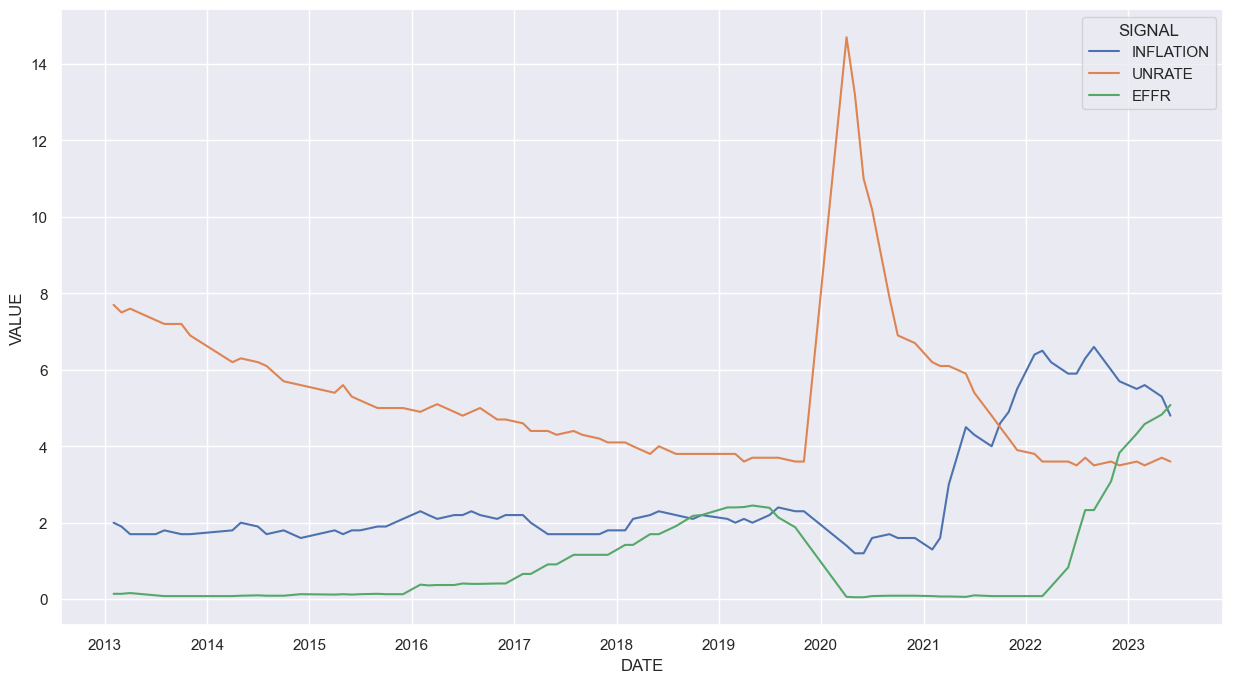

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

sns.set(rc={'figure.figsize':(15 , 8)})

# #sns.set_theme(style="darkgrid")
# sns.relplot(data=merged, x="DATE", y="UNRATE", kind="line", color='red', errorbar='sd')
# #sns.lineplot(data=unrate, x='DATE', y='UNRATE', color='red')
# #sns.lineplot(data=effr, x='DATE', y='PERCENT_RATE', color='orange')
# sns.relplot(data=merged, x="DATE", y="EFFR", kind="line", color='blue')
# #sns.lineplot(data=fred, x='DATE', y='FEDFUNDS', color='blue')
# sns.relplot(data=merged, x="DATE", y="PCEPILFE", kind="line", color='orange')
sns.lineplot(data=merged, x='DATE', y='VALUE', hue='SIGNAL')

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()